# Exploratory analysis of ACTS data

This notebook demonstrates usage of the latest ACTS data (matching what will be used in the Tracking ML Challenge) and explores some of the data's characteristics

In [1]:
from __future__ import print_function

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from dataset import load_event

%matplotlib notebook

In [2]:
def draw_scatter_2d(x, y, s=1, marker='.', xlabel=None, ylabel=None, label=None, **kwargs):
    plt.scatter(x, y, s=s, marker=marker, label=label, **kwargs)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)

## Load the data

In [3]:
data_dir = '/global/cscratch1/sd/sfarrell/ACTS/prod_20171031_233247'

In [4]:
# Load the first event
sample = 'event000000000'
data = load_event(os.path.join(data_dir, sample))
hits, particles, truth = map(pd.DataFrame, data)

/global/cscratch1/sd/sfarrell/ACTS/prod_20171031_233247/event000000000


In [5]:
# Calculate derived variables
hits['r'] = np.sqrt(hits.x**2 + hits.y**2)
hits['phi'] = np.arctan2(hits.y, hits.x)

In [6]:
hits.head()

,hit_id,volume_id,layer_id,module_id,x,y,z,ex,ey,ez,phi,theta,ephi,etheta,ncells,r
0,1,7,2,1,-65.425499,-2.064590,-1502.5,-1.0,-1.0,-1.0,-3.110047,3.09805,-1.0,-1.0,2,65.458069
1,2,7,2,1,-55.752800,-1.955340,-1502.5,-1.0,-1.0,-1.0,-3.106535,3.10448,-1.0,-1.0,1,55.787079
2,3,7,2,1,-53.653801,0.767741,-1502.5,-1.0,-1.0,-1.0,3.127285,3.10589,-1.0,-1.0,1,53.659294
3,4,7,2,1,-93.733101,-7.251570,-1502.5,-1.0,-1.0,-1.0,-3.064382,3.07910,-1.0,-1.0,2,94.013191
4,5,7,2,1,-37.351002,2.652650,-1502.5,-1.0,-1.0,-1.0,3.070692,3.11668,-1.0,-1.0,2,37.445076


In [7]:
hits.shape, particles.shape

((104996, 16), (13748, 8))

<IPython.core.display.Javascript object>


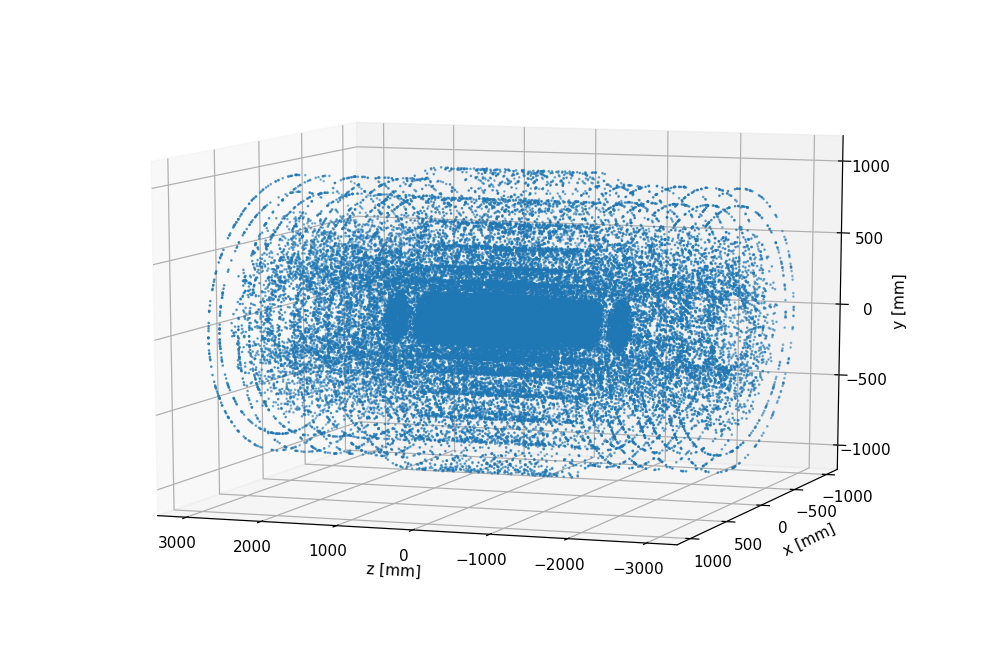

In [8]:
# Draw the full 3D distribution of hits
ax = plt.figure(figsize=(9, 6)).add_subplot(111, projection='3d')
ax.scatter(hits.z, hits.x, hits.y, s=0.5)
ax.set_xlabel('z [mm]')
ax.set_ylabel('x [mm]')
ax.set_zlabel('y [mm]')
ax.view_init(10, 110)
plt.tight_layout()

### 2D scatter plots

<IPython.core.display.Javascript object>


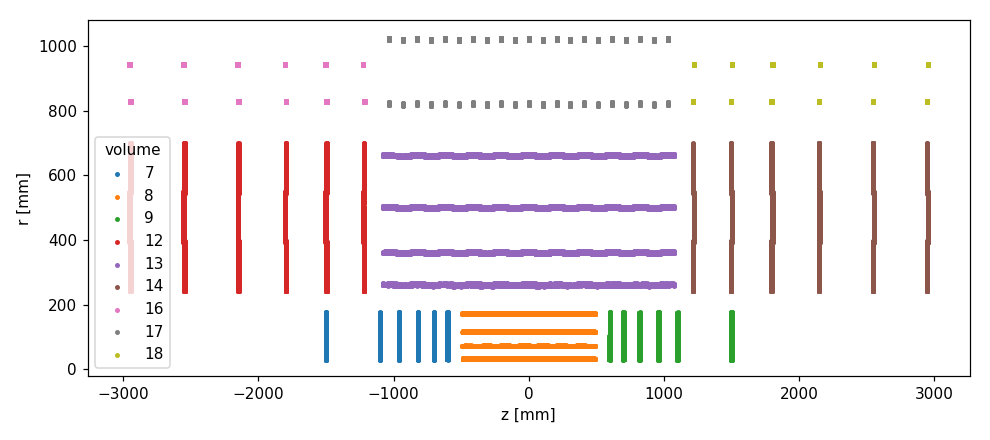

<IPython.core.display.Javascript object>


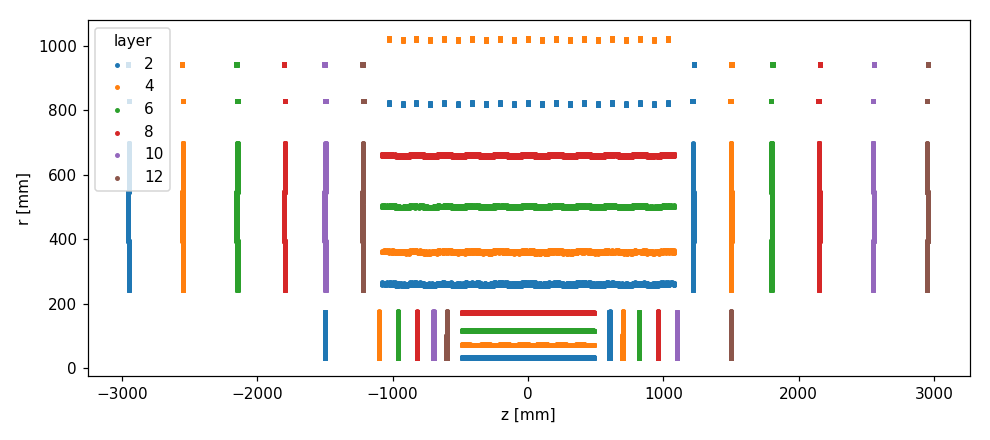

In [9]:
# Draw the hits by volume
plt.figure(figsize=(9,4))
for vol, vol_hits in hits.groupby('volume_id'):
    plt.scatter(vol_hits.z, vol_hits.r, s=5, label=vol)
plt.xlabel('z [mm]')
plt.ylabel('r [mm]')
plt.legend(loc=0, title='volume')
plt.tight_layout()

# Draw the hits by layer
plt.figure(figsize=(9,4))
for lay, lay_hits in hits.groupby('layer_id'):
    plt.scatter(lay_hits.z, lay_hits.r, s=5, label=lay)
plt.xlabel('z [mm]')
plt.ylabel('r [mm]')
plt.legend(loc=0, title='layer')
plt.tight_layout()

<IPython.core.display.Javascript object>


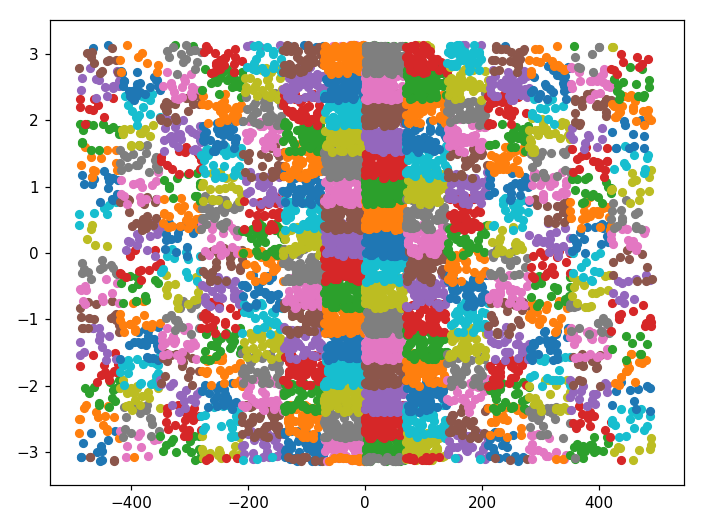

In [10]:
# Visualize modules on the first layer
lay0_hits = hits.groupby(['volume_id', 'layer_id']).get_group((8, 2))
plt.figure()
# Draw each module separately
for mod, mod_hits in lay0_hits.groupby('module_id'):
    plt.scatter(mod_hits.z, mod_hits.phi, s=100, marker='.')
plt.tight_layout()

<IPython.core.display.Javascript object>


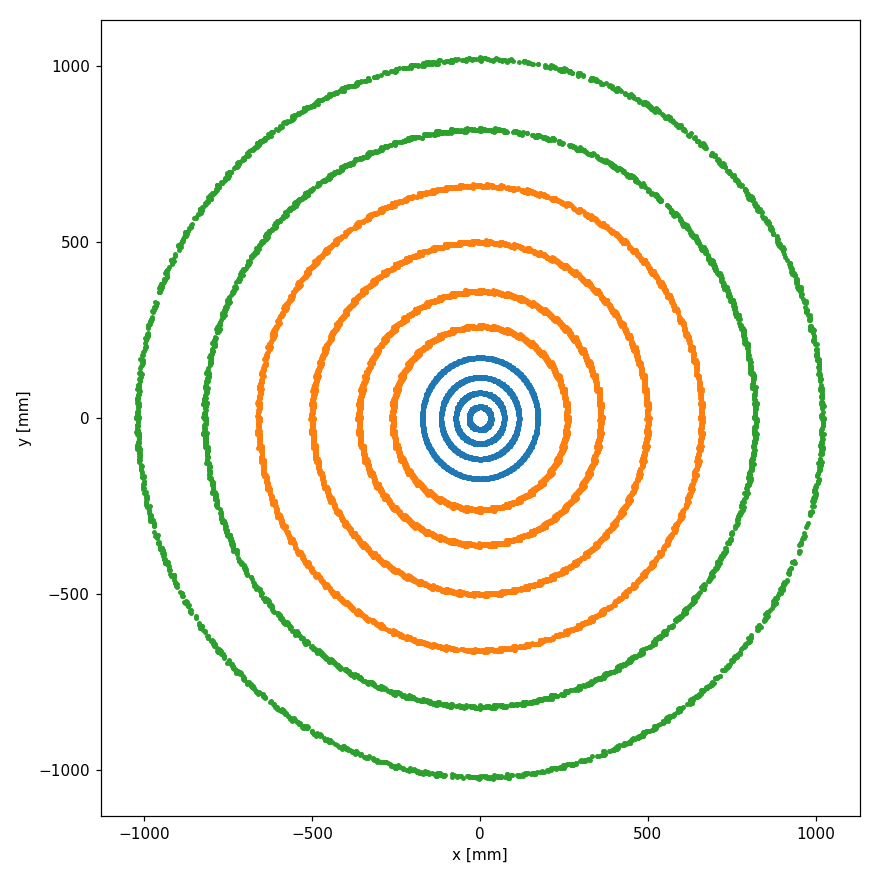

In [11]:
# Draw X-Y view of the barrel volumes
barrel_vols = [8, 13, 17]
vol_groups = hits.groupby('volume_id')

plt.figure(figsize=(8,8))
for vol in barrel_vols:
    vol_hits = vol_groups.get_group(vol)
    plt.scatter(vol_hits.x, vol_hits.y, s=5)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.tight_layout()

<IPython.core.display.Javascript object>


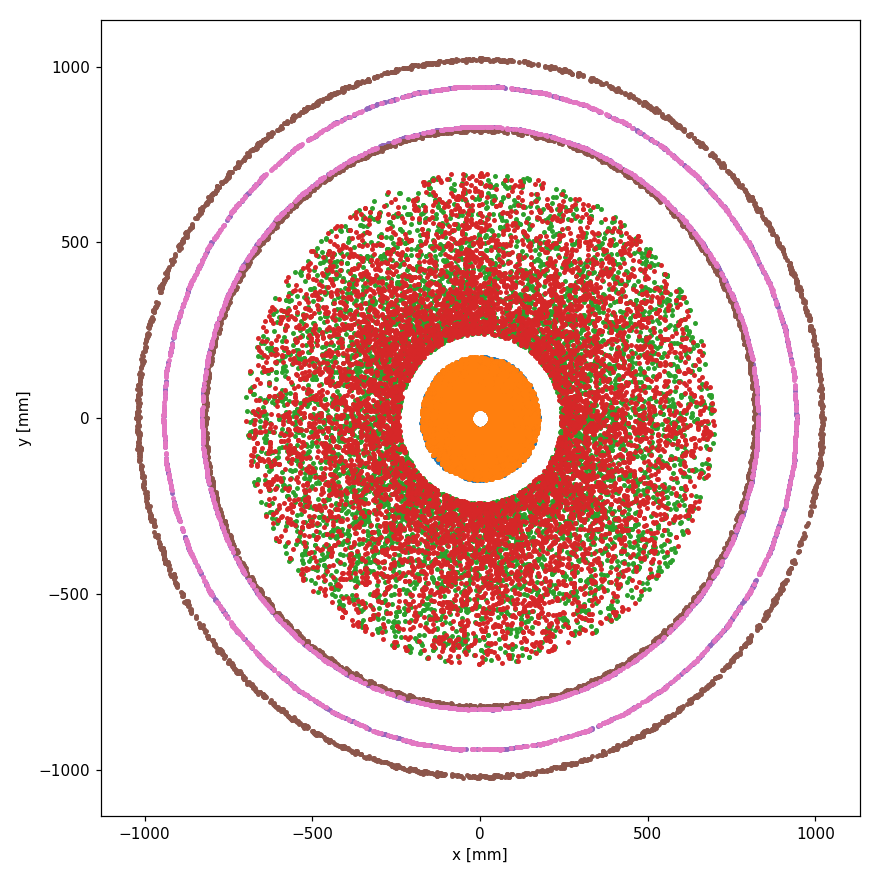

In [20]:
# Draw X-Y view of the endcaps
endcap_vols = [7, 9, 12, 14, 16, 17, 18]
plt.figure(figsize=(8,8))
for vol in endcap_vols:
    vol_hits = vol_groups.get_group(vol)
    plt.scatter(vol_hits.x, vol_hits.y, s=5)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.tight_layout()

<IPython.core.display.Javascript object>


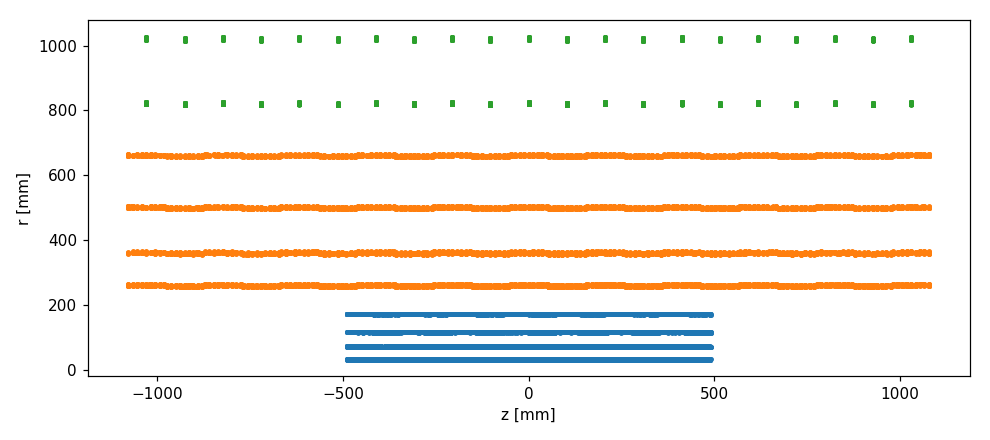

In [27]:
# Draw the Z-R view of barrel volumes
#barrel_vols = [8, 13, 17]
#vol_groups = hits.groupby('volume_id')

plt.figure(figsize=(9,4))
for vol in barrel_vols:
    vol_hits = vol_groups.get_group(vol)
    plt.scatter(vol_hits.z, vol_hits.r, s=5)
plt.xlabel('z [mm]')
plt.ylabel('r [mm]')
plt.tight_layout()

In [28]:
barrel_vols

[8, 13, 17]

<IPython.core.display.Javascript object>


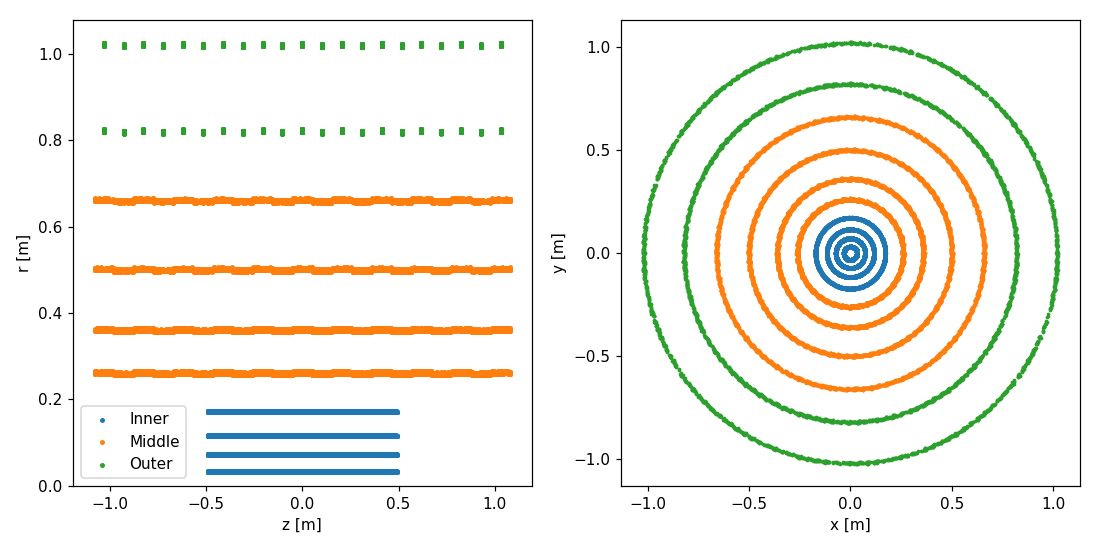

In [46]:
# Draw the Z-R and x-y views of the barrel volumes

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
v0_hits = vol_groups.get_group(8)
v1_hits = vol_groups.get_group(13)
v2_hits = vol_groups.get_group(17)

axs[0].scatter(v0_hits.z*1e-3, v0_hits.r*1e-3, s=5, label='Inner')
axs[0].scatter(v1_hits.z*1e-3, v1_hits.r*1e-3, s=5, label='Middle')
axs[0].scatter(v2_hits.z*1e-3, v2_hits.r*1e-3, s=5, label='Outer')
axs[0].set_ylim(ymin=0)
axs[0].set_xlabel('z [m]')
axs[0].set_ylabel('r [m]')
axs[0].legend(loc=0)

axs[1].scatter(v0_hits.x*1e-3, v0_hits.y*1e-3, s=2)
axs[1].scatter(v1_hits.x*1e-3, v1_hits.y*1e-3, s=2)
axs[1].scatter(v2_hits.x*1e-3, v2_hits.y*1e-3, s=2)
axs[1].set_xlabel('x [m]')
axs[1].set_ylabel('y [m]')

plt.tight_layout()

## Particle distributions

In [13]:
# Calculate derived variables
particles['pt'] = np.sqrt(particles.px**2 + particles.py**2)

In [14]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,pt
0,0,-0.004456,0.00465,3.19061,614.398987,-575.362000,30067.800781,1,841.740784
1,137438953472,-0.004456,0.00465,3.19061,-188.929001,-5.889430,-4348.370117,-1,189.020767
2,206158430208,-0.004456,0.00465,3.19061,32.636600,441.131989,-7357.939941,1,442.337616
3,274877906944,-0.004456,0.00465,3.19061,62.283699,-224.740005,-1324.439941,-1,233.210907
4,343597383680,-0.004456,0.00465,3.19061,481.276001,785.393982,-110532.000000,1,921.124451


<IPython.core.display.Javascript object>


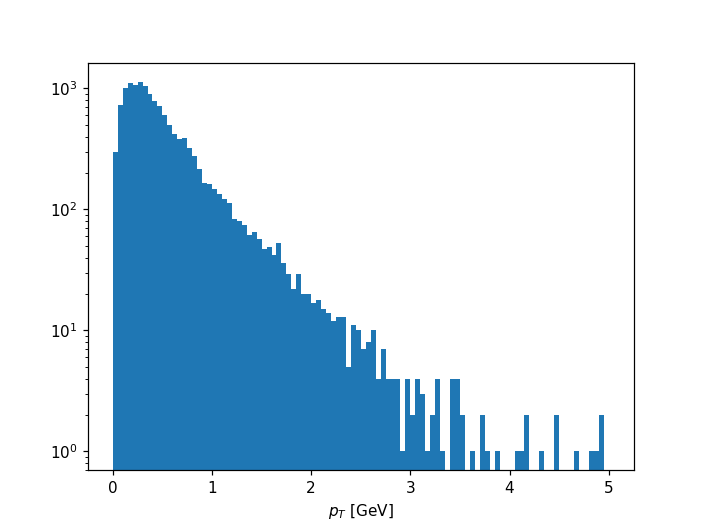

In [25]:
plt.figure()
plt.hist(particles.pt*1e-3, bins=100, range=[0, 5], log=True)
plt.xlabel('$p_T$ [GeV]')

## Visualize some tracks

In [16]:
hits = hits.merge(truth, on='hit_id')

In [17]:
hits.head()

,hit_id,volume_id,layer_id,module_id,x,y,z,ex,ey,ez,phi,theta,ephi,etheta,ncells,r,particle_id
0,1,7,2,1,-65.425499,-2.064590,-1502.5,-1.0,-1.0,-1.0,-3.110047,3.09805,-1.0,-1.0,2,65.458069,137438953472
1,2,7,2,1,-55.752800,-1.955340,-1502.5,-1.0,-1.0,-1.0,-3.106535,3.10448,-1.0,-1.0,1,55.787079,1168231104512
2,3,7,2,1,-53.653801,0.767741,-1502.5,-1.0,-1.0,-1.0,3.127285,3.10589,-1.0,-1.0,1,53.659294,40536932131799040
3,4,7,2,1,-93.733101,-7.251570,-1502.5,-1.0,-1.0,-1.0,-3.064382,3.07910,-1.0,-1.0,2,94.013191,40543323043135488
4,5,7,2,1,-37.351002,2.652650,-1502.5,-1.0,-1.0,-1.0,3.070692,3.11668,-1.0,-1.0,2,37.445076,54047249977573376


<IPython.core.display.Javascript object>


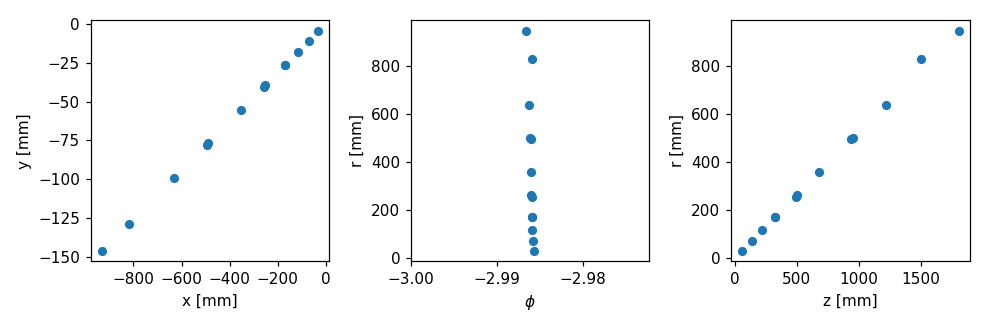

<IPython.core.display.Javascript object>


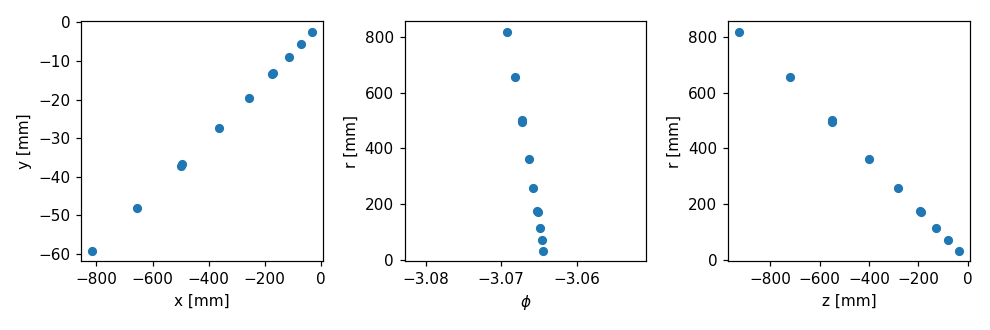

<IPython.core.display.Javascript object>


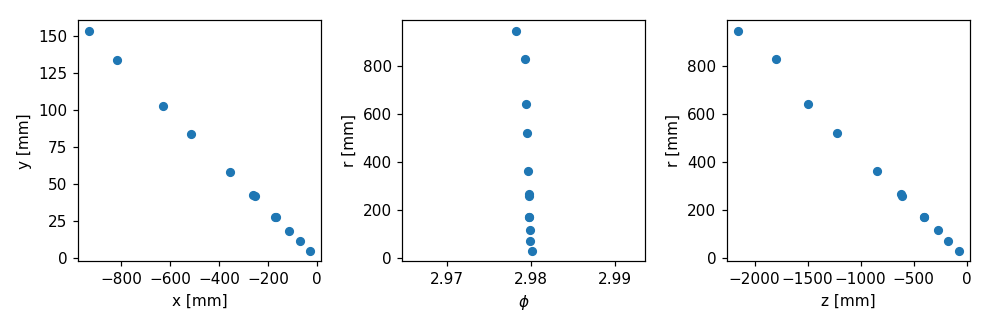

<IPython.core.display.Javascript object>


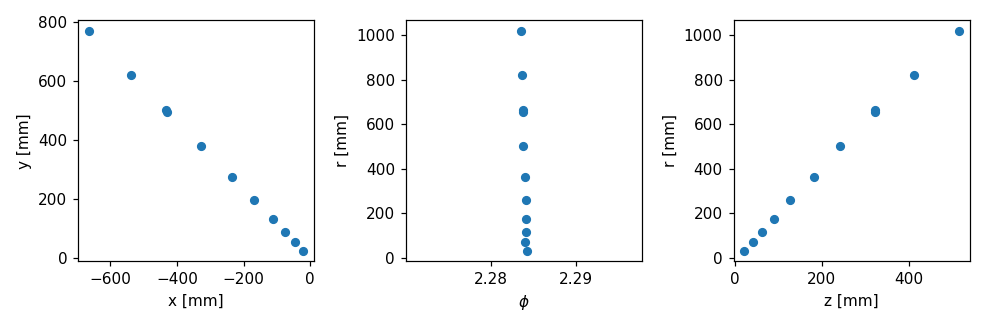

In [18]:
hits_groups = hits.groupby('particle_id')

# Choose a random sampling of particles
n = 4
pids = np.random.choice(truth.particle_id, size=n)
for pid in pids:
    par_hits = hits_groups.get_group(pid)
    plt.figure(figsize=(9,3))
    plt.subplot(131)
    draw_scatter_2d(par_hits.x, par_hits.y, s=100, xlabel='x [mm]', ylabel='y [mm]')
    plt.subplot(132)
    draw_scatter_2d(par_hits.phi, par_hits.r, s=100, xlabel='$\phi$', ylabel='r [mm]')
    plt.subplot(133)
    draw_scatter_2d(par_hits.z, par_hits.r, s=100, xlabel='z [mm]', ylabel='r [mm]')
    plt.tight_layout()

<IPython.core.display.Javascript object>


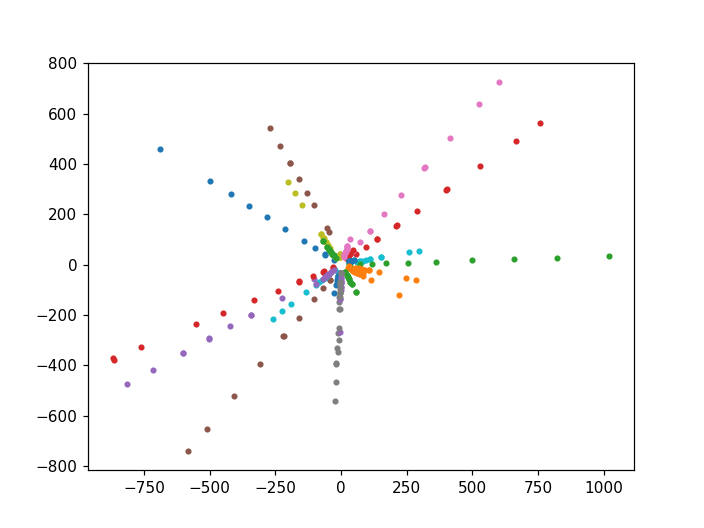

In [19]:
# Let's draw a bunch of connected tracks together in the X-Y view
plt.figure()

# Loop over a random sampling of particles
n = 25
pids = np.random.choice(truth.particle_id, size=n)
for pid in pids:
    par_hits = hits_groups.get_group(pid)
    plt.plot(par_hits.x, par_hits.y, '.')
    #     draw_scatter_2d(par_hits.x, par_hits.y, s=100, xlabel='x [mm]', ylabel='y [mm]')

## Discussion

It looks like there is no magnetic field in this data. None of the tracks seem to curve.
I need to look into what happened there. I specified a constant z field in production, but perhaps it didn't work as expected.